In [1]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim

Loading BokehJS ...

# raise k_er; raise k_de

In [4]:
k_er_per_s = 1e8
k_br_per_s = 1e8  # constant for radiativ decay from S11*
k_enr_per_s = 2e8 
k_bnr_per_s = 4e8   # constant for non-radiativ decay from S11*

k_de_per_s = 1e8  # constant for going from dark to S11 state
k_ed_per_s = 1e8  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))
k_dnr_per_s = 2e8

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s,
                        k_de_per_s, k_dnr_per_s])

In [5]:
exc_sim_rk_7 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_7.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:31: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [7]:
exc_sim_rk_7.calc_dict['chosen_const']

array(['k_er', 'k_de'], dtype=object)

In [8]:
exc_sim_rk_7.calc_dict['constant_dependence']

array([[1.e+08, 1.e+08],
       [2.e+08, 2.e+08],
       [3.e+08, 3.e+08],
       [4.e+08, 4.e+08],
       [5.e+08, 5.e+08],
       [6.e+08, 6.e+08],
       [7.e+08, 7.e+08],
       [8.e+08, 8.e+08],
       [9.e+08, 9.e+08],
       [1.e+09, 1.e+09]])

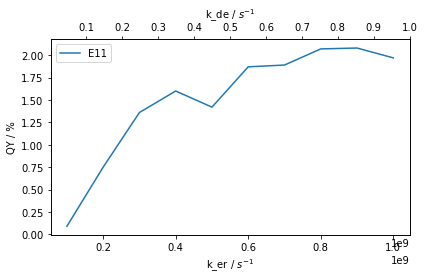

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_7.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_7.calc_dict['constant_dependence'][:, 0], exc_sim_rk_7.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

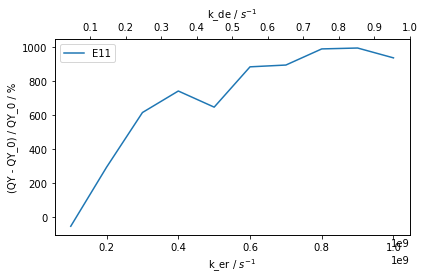

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_7.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_7.calc_dict['constant_dependence'][:, 0], exc_sim_rk_7.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

In [12]:
exc_sim_rk_8 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_8.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:31: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


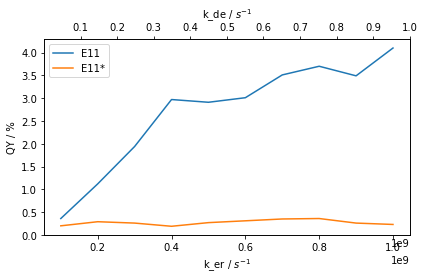

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_8.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_8.calc_dict['constant_dependence'][:, 0], exc_sim_rk_8.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_8.calc_dict['constant_dependence'][:, 0], exc_sim_rk_8.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

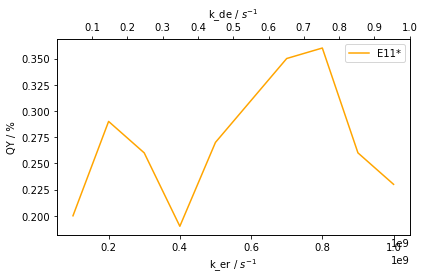

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_8.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_8.calc_dict['constant_dependence'][:, 0], exc_sim_rk_8.QY[:, 0]*100, label='E11*',
        color='orange')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

### highter k_ed

In [15]:
exc_sim_rk_9 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_9.h5', kin_const_1)

Existing file loaded successfully.


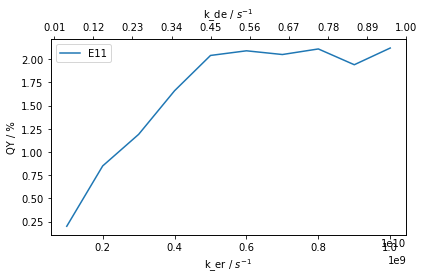

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_9.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_9.calc_dict['constant_dependence'][:, 0], exc_sim_rk_9.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

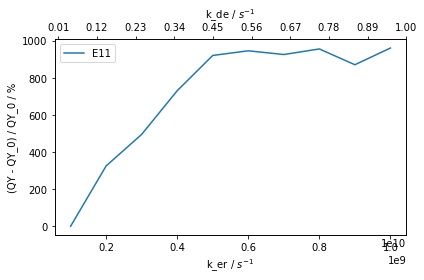

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_9.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_9.calc_dict['constant_dependence'][:, 0], exc_sim_rk_9.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

In [19]:
exc_sim_rk_10 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_10.h5', kin_const_1)

Existing file loaded successfully.


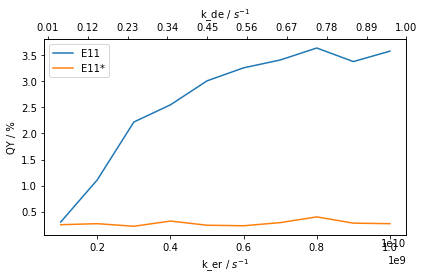

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_10.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_10.calc_dict['constant_dependence'][:, 0], exc_sim_rk_10.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_10.calc_dict['constant_dependence'][:, 0], exc_sim_rk_10.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

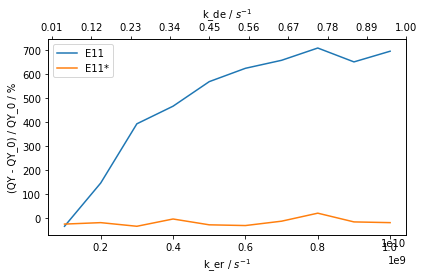

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_10.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_10.calc_dict['constant_dependence'][:, 0], exc_sim_rk_10.QY_delta[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_10.calc_dict['constant_dependence'][:, 0], exc_sim_rk_10.QY_delta[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

### raise k_er

In [22]:
exc_sim_rk_11 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_prist_11.h5', kin_const_1)

Existing file loaded successfully.


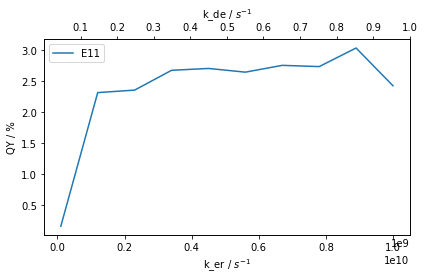

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_11.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_11.calc_dict['constant_dependence'][:, 0], exc_sim_rk_11.QY[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

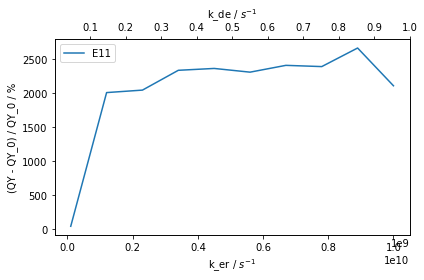

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_11.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_11.calc_dict['constant_dependence'][:, 0], exc_sim_rk_11.QY_delta[:, 1]*100, label='E11')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()

In [25]:
exc_sim_rk_12 = CNTSimFile('../sim_output/2020-09-25-exciton_sim-rate-const_defected_12.h5', kin_const_1)

Existing file loaded successfully.


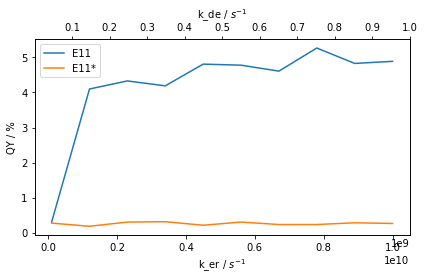

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_12.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_12.calc_dict['constant_dependence'][:, 0], exc_sim_rk_12.QY[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_12.calc_dict['constant_dependence'][:, 0], exc_sim_rk_12.QY[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('QY / %')
ax1.legend()
plt.tight_layout()

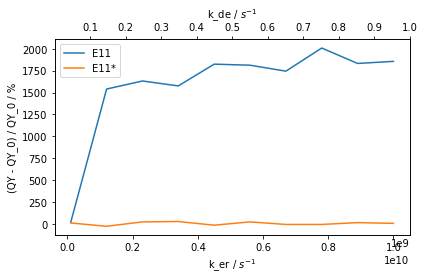

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(exc_sim_rk_12.calc_dict['constant_dependence'][:, 1])
ax2.set_xlabel('k_de / $s^{-1}$')
ax1.plot(exc_sim_rk_12.calc_dict['constant_dependence'][:, 0], exc_sim_rk_12.QY_delta[:, 1]*100, label='E11')
ax1.plot(exc_sim_rk_12.calc_dict['constant_dependence'][:, 0], exc_sim_rk_12.QY_delta[:, 0]*100, label='E11*')
ax1.set_xlabel('k_er / $s^{-1}$')
ax1.set_ylabel('(QY - QY_0) / QY_0 / %')
ax1.legend()
plt.tight_layout()